# Week 5
# Aidin Attar - 2048654

### Table of contents:
- [Libraries](#lib)
- [Exercise 1 - Poisson particles emission](#ex1)
    - [(a) Uniform Prior](#ex1a)
        - [(c) Credibility intervals](#ex1ca)
    - [(b) Jeffrey's Prior](#ex1b)
        - [(c) Credibility intervals](#ex1cb)
- [Exercise 2 - Lighthouse problem](#ex2)
- [Exercise 3 - Signal over Background](#ex3)

## Library<a class="anchor" id="lib"></a>

## Exercise 1 - Poisson particles emission<a class="anchor" id="ex1"></a>

### (a) Uniform Prior <a class="anchor" id="ex1a"></a>

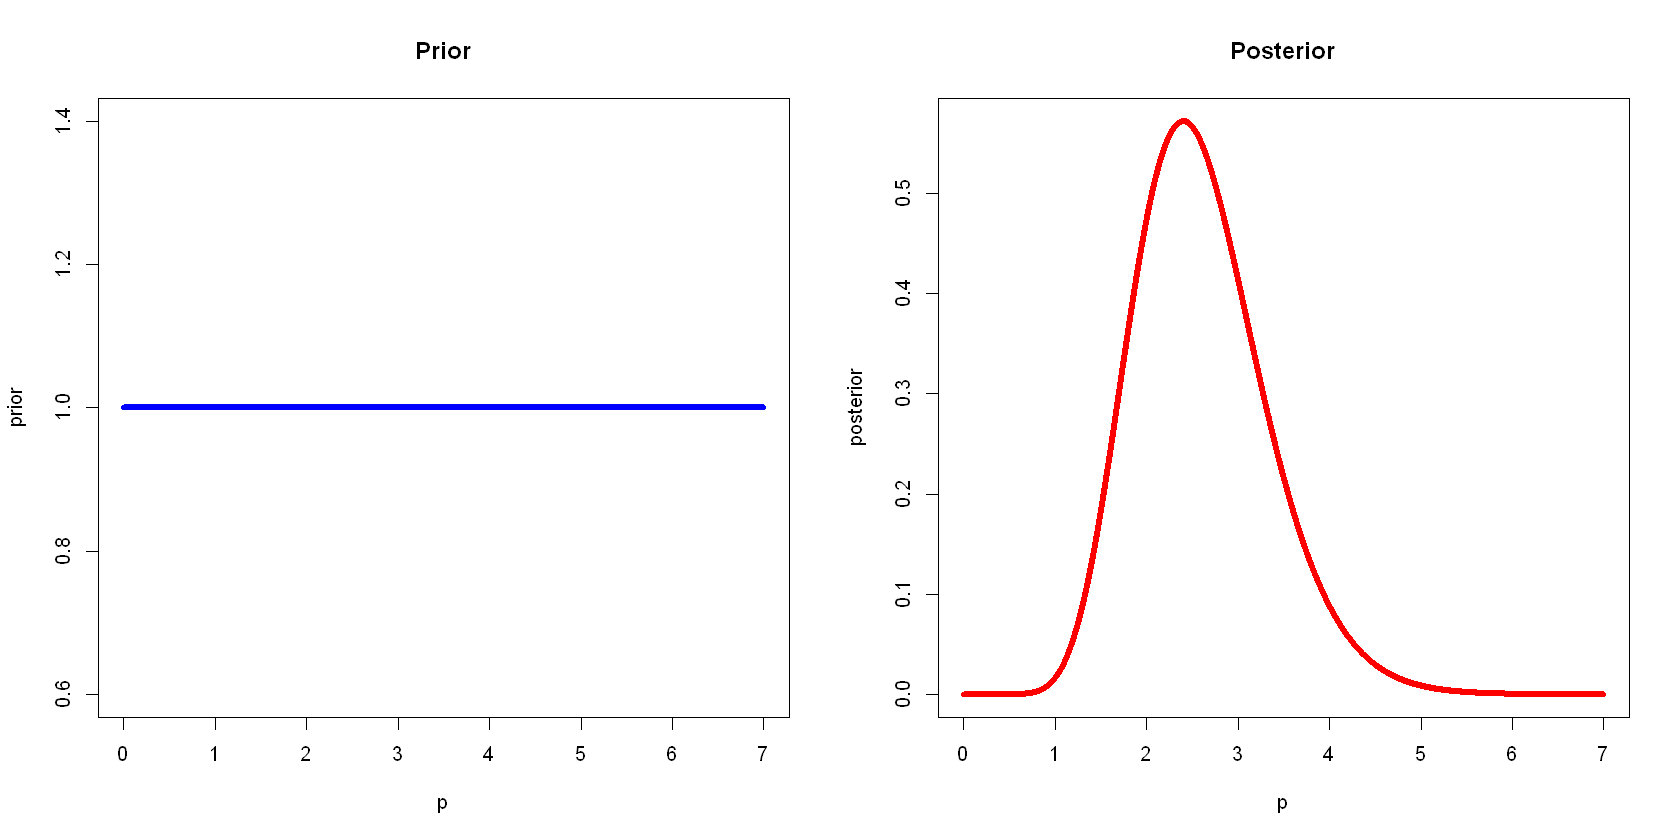

In [1]:
p<-seq(0,7,.001)
y<-c(4,1,3,1,3)
n<-length(y)

#dunif(x=p, min=0, max=7)
prior<-rep(1, length(p))

alpha<-sum(y)+1
lambda<-n
posterior<-dgamma(x=p, shape=alpha, rate=lambda)

options(repr.plot.width = 14, repr.plot.height = 7)
par(mfrow = c(1,2))
plot(p,prior,     type="l", main="Prior",     lwd=5, col='blue')
plot(p,posterior, type="l", main="Posterior", lwd=5, col='red' )

In [2]:
# numerical
#p[which.max(posterior)]

post<-function(p){
    return(dgamma(x=p, shape=alpha, rate=lambda))
}

Ex<-function(p){
    return(p*dgamma(x=p, shape=alpha, rate=lambda))
}

Ex2<-function(p){
    return(p*p*dgamma(x=p, shape=alpha, rate=lambda))
}

normalization<-integrate(post, lower=0, upper=7)$value
posterior<-post(p)/(normalization)
mean<-integrate(Ex, lower=0, upper=7)$value
var<-integrate(Ex2, lower=0, upper=7)$value-mean^2
median<-qgamma(.5, shape=alpha, rate=lambda)

cat("Mean: :\t",   round(mean,   1), 
    "\nVar:\t",    round(var,    1),
    "\nMedian:\t", round(median, 1))

Mean: :	 2.6 
Var:	 0.5 
Median:	 2.5

In [3]:
# analytical

mean<-alpha/lambda
var<-alpha/lambda^2

cat("Mean: :\t",   round(mean,   1), 
    "\nVar:\t",    round(var,    1),
    "\nMedian:\t", "There is no simple closed form")

Mean: :	 2.6 
Var:	 0.5 
Median:	 There is no simple closed form

#### (c) Credibility Intervals <a class="anchor" id="ex1ca"></a>

In [4]:
#m = seq(0.0001,7,0.001)
#prob = 0
#i = 1

#while(prob < 0.95){
#    i<-i+1
#    prob<-integrate(post, lower=mean-m[i], upper=mean+m[i])$value
#}

#cat("Best estiamtion: \t\t", mean, "\n95% CI for Uniform Prior:\t [", mean-m[i], ", ", mean+m[i], "]")

cat("Best estiamtion: \t\t", mean, "\n95% CI for Uniform Prior:\t [", 
    qgamma(.025,alpha,lambda), ", ", qgamma(.975,alpha,lambda), "]")

Best estiamtion: 		 2.6 
95% CI for Uniform Prior:	 [ 1.38439 ,  4.192317 ]

### (b) Jeffrey's Prior <a class="anchor" id="ex1b"></a>

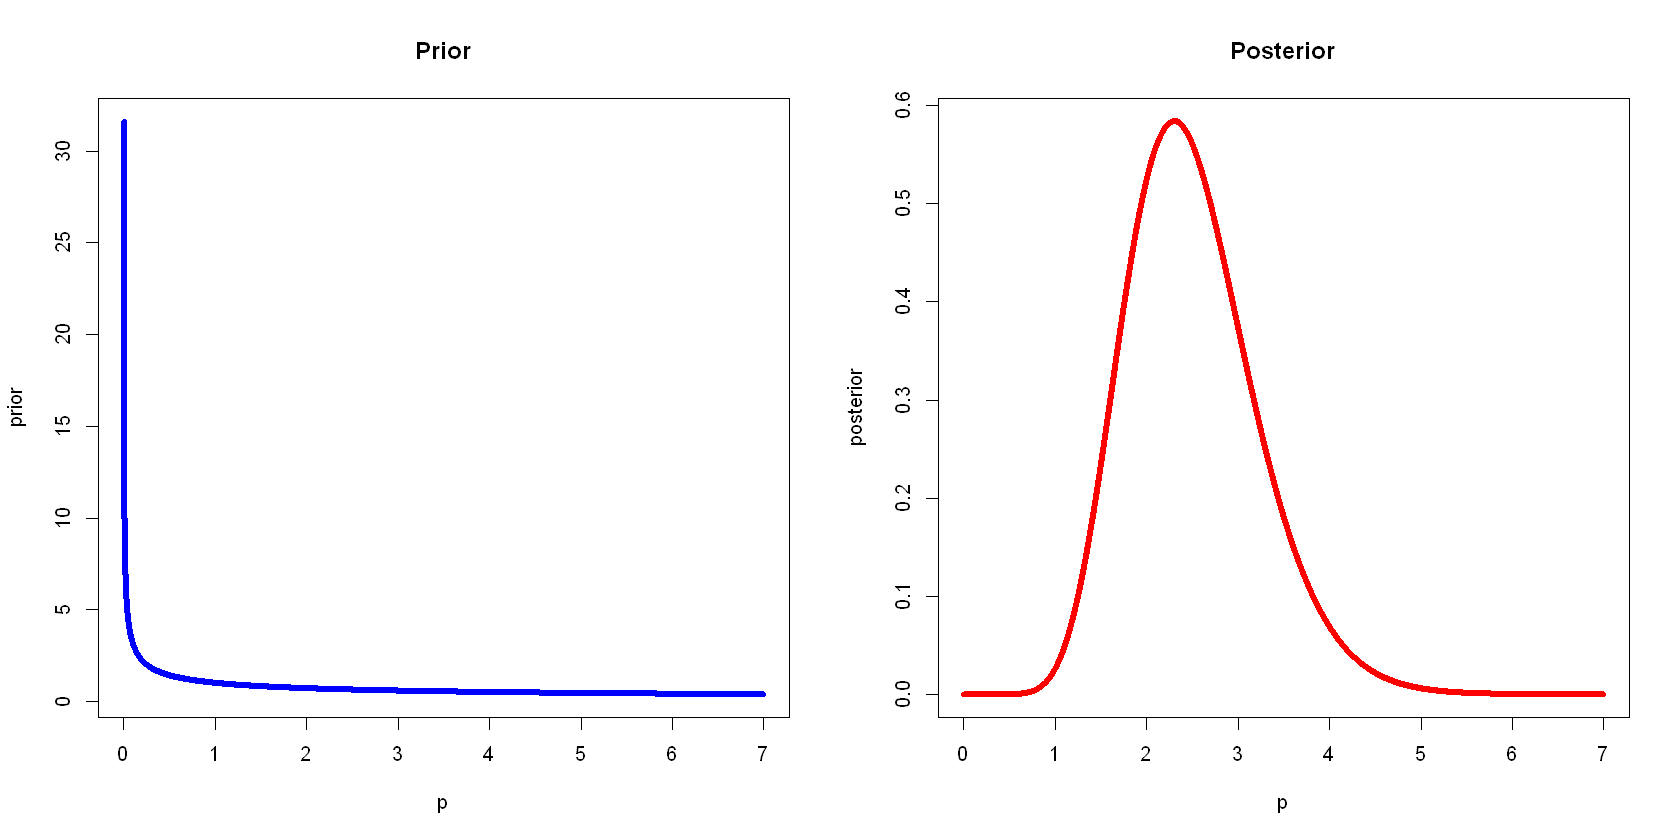

In [5]:
prior<-1/sqrt(p)

alpha<-sum(y)+1/2
lambda<-n
posterior<-dgamma(x=p, shape=alpha, rate=lambda)

options(repr.plot.width = 14, repr.plot.height = 7)
par(mfrow = c(1,2))
plot(p,prior,     type="l", main="Prior",     lwd=5, col='blue')
plot(p,posterior, type="l", main="Posterior", lwd=5, col='red' )

In [6]:
# numerical
#p[which.max(posterior)]

post<-function(p){
    return(dgamma(x=p, shape=alpha, rate=lambda))
}

Ex<-function(p){
    return(p*dgamma(x=p, shape=alpha, rate=lambda))
}

Ex2<-function(p){
    return(p*p*dgamma(x=p, shape=alpha, rate=lambda))
}

normalization<-integrate(post, lower=0, upper=7)$value
posterior<-post(p)/(normalization)
mean<-integrate(Ex, lower=0, upper=7)$value
var<-integrate(Ex2, lower=0, upper=7)$value-mean^2
median<-qgamma(.5, shape=alpha, rate=lambda)

cat("Mean: :\t",   round(mean,   1), 
    "\nVar:\t",    round(var,    1),
    "\nMedian:\t", round(median, 1))

Mean: :	 2.5 
Var:	 0.5 
Median:	 2.4

In [7]:
# analytical

mean<-alpha/lambda
var<-alpha/lambda^2

cat("Mean: :\t",   round(mean,   1), 
    "\nVar:\t",    round(var,    1),
    "\nMedian:\t", "There is no simple closed form")

Mean: :	 2.5 
Var:	 0.5 
Median:	 There is no simple closed form

#### (c) Credibility Intervals <a class="anchor" id="ex1cb"></a>

In [8]:
#m = seq(0.,7,0.0001)
#prob = 0
#i = 1

#while(prob < 0.95){
#    i<-i+1
#    prob<-integrate(post, lower=mean-m[i], upper=mean+m[i])$value
#}

#cat("Best estiamtion: \t\t", mean, "\n95% CI for Uniform Prior:\t [", mean-m[i], ", ", mean+m[i], "]")


cat("Best estiamtion: \t\t", mean, "\n95% CI for Uniform Prior:\t [", 
    qgamma(.025,alpha,lambda), ", ", qgamma(.975,alpha,lambda), "]")

Best estiamtion: 		 2.5 
95% CI for Uniform Prior:	 [ 1.311972 ,  4.064647 ]

## Exercise 2 - Lighthouse problem<a class="anchor" id="ex2"></a>

Considering a uniform prior distribution the likelihood follows a Cauchy distribution, which is symmetric about the maximum $\alpha$ and with a FWHM of $2\beta$:

$$P(x|\alpha, \beta) = \frac{1}{\pi}\frac{\beta}{\beta^2+(x-\alpha)^2}$$

In [9]:
 # unkonwn true values
alpha_true = 10
beta_true = 30

alpha_min <- -100
alpha_max <- 100
beta_min  <- 0
beta_max  <- 60

length.list = 200

alpha_list <- seq(alpha_min, alpha_max, length.out = length.list)
beta_list  <- seq( beta_min,  beta_max, length.out = length.list)

n_detections <-c(2,5,10,20,50,100,200,500,1000)

logPrior <- function(alpha, beta){
    return(log(dunif(alpha, alpha_min, alpha_max))+log(dunif(beta, beta_min, beta_max)))
}

Likelihood <- function(x,alpha=1,beta=1){
    return(beta/(pi*(beta^2 + (x - alpha)^2)))
}

logLikelihood <- function(x, alpha, beta){
    logL <- 0
    for(d in x){
        logL <- logL + log(Likelihood(d, alpha, beta))
    }
    return(logL)
}

logPosterior <- function(x, alpha, beta){
    return(logLikelihood(x, alpha, beta)+logPrior(alpha, beta))
}

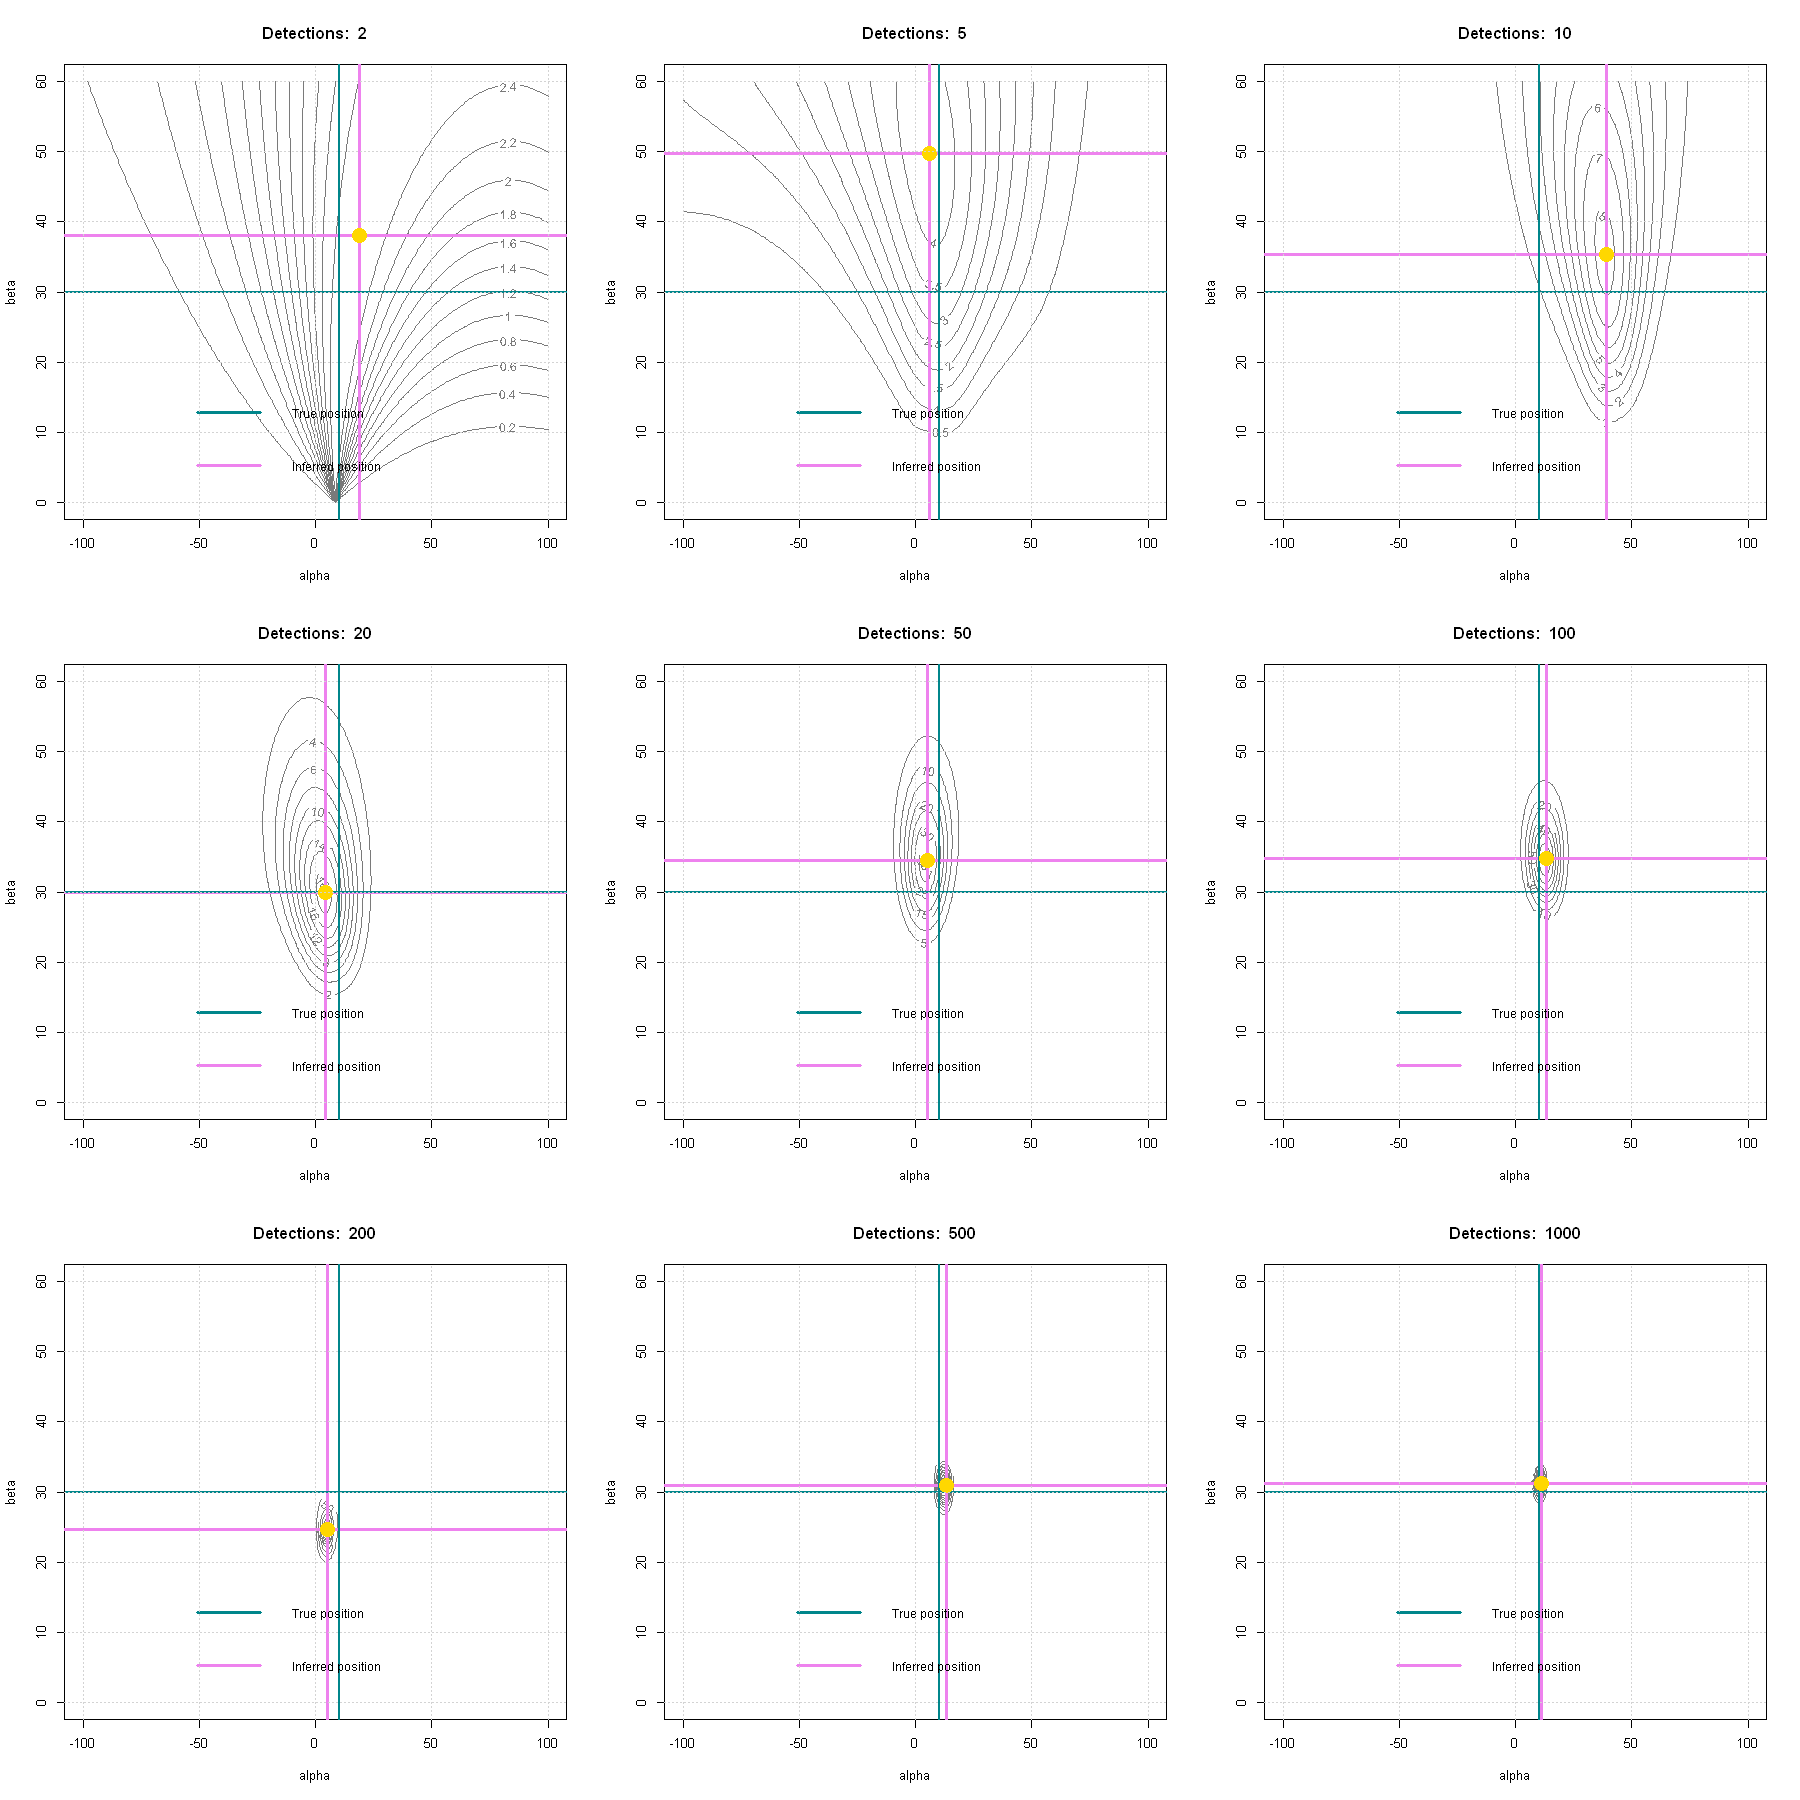

In [10]:
# this cell takes about a minute to run

options(repr.plot.width=15, repr.plot.height=15)
par(mfrow = c(3, 3))

for (detection in n_detections){
    #inference
    uniform.theta<- runif(detection, min=-pi/2, max=+pi/2)
    data.true    <- beta_true*tan(uniform.theta)+alpha_true

    p.log.post <- outer(alpha_list, beta_list, Vectorize(function(alpha,beta) logPosterior(data.true, alpha, beta)))
    p.log.post <- p.log.post-max(p.log.post)
    p.log.post.normalized <- exp(p.log.post)/(1/(length.list^2) * sum(exp(p.log.post)))
    m.p.value =which(p.log.post.normalized== max(p.log.post.normalized), arr.ind = TRUE) 
                                                         
    #plot
    contour(alpha_list, beta_list, p.log.post.normalized,col ='gray48',xlab='alpha', ylab='beta', main=paste('Detections: ', detection))
    abline(v=m.p.value[1]-100,col='violet',lwd=3)
    abline(h=m.p.value[2]*beta_max/length.list,col='violet',lwd=3)
    abline(h=beta_true,lwd=2, col='turquoise4')
    abline(v=alpha_true,lwd=2, col='turquoise4')
    points(m.p.value[1]-100,m.p.value[2]*beta_max/length.list,pch=19, col='gold', cex=2.5)

    legend('bottomright',
           legend=c("True position",
                    "Inferred position"),
           col=c("turquoise4",
                 "violet"),
           lty=1:1,
           lwd=3:3,
           bty = "n",
           cex=0.9
          )
    grid()
}

## Exercise 3 - Signal over Background<a class="anchor" id="ex3"></a>

In [11]:
signal <- function(x, a, b, x0, w, t) {
    # - Generative model
    t*(a*exp(-(x-x0)^2/(2*w^2)) + b)
}

log.post <- function(d, x, a, b, x0, w, t) {
    #posterior
    if(a<0 || b <0) {return(-Inf)} # the effect of the prior
    sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
}

Results <- function(w, A.true, B.true, Delta.t){
    
    #function that returns a run of the experiment for:
    #some resolution = w;
    #amplitude/background ratio = A.true/B.true;
    #exposure time = Delta.t
      
    alim <- c(0.0, A.true+min(c(2, A.true/2)))
    blim <- c(0.5, B.true+min(c(2, B.true/2)))
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
    delta_a <- diff(alim)/Nsamp 
    delta_b <- diff(blim)/Nsamp
    a <- alim[1] + diff(alim)*uniGrid 
    b <- blim[1] + diff(blim)*uniGrid
    
    #variables setup and signal generation
    x0<-0
    
    set.seed(205)
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdat, A.true, B.true, x0, w, Delta.t) 
    ddat <- rpois(length(s.true), s.true)
    
    # Compute log unnormalized posterior, z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA, nrow=length(a), ncol=length(b)) 
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t)
        } 
    }
    z <- z - max(z) #set maximum to zero
    
    #marginalization
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/(delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum) 
    p_b_D <- p_b_D/(delta_b*sum(p_b_D))
    
    p_a_bD <- exp(Vectorize(log.post, "a")(ddat, xdat, a, B.true, x0, w, Delta.t))
    p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
    p_b_aD <- exp(Vectorize(log.post, "b")(ddat, xdat, A.true, b, x0, w, Delta.t))
    p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
    
    par(mfrow=c(1,4), mgp=c(2,0.8,0), mar=c(4,4,3,2), oma=0.1*c(1,1,1,1), cex.lab=1.5, cex.main=1.5)

    #plot data
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
    splot <- signal(xplot, A.true, B.true, x0, w, Delta.t) 
    plot(xplot, splot, ylim=range(c(splot, ddat)), xlab="x", ylab="Signal+Background counts", type="l", col="grey", lwd=2, main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    par(new=TRUE)
    plot(xdat , ddat , type='s',col='firebrick3',lwd=2, xlab="", ylab="", xlim=range(xplot), ylim=range(c(splot, ddat)))
    
    # Plot unnormalized 2D posterior as contours. 
    contour(a, b, exp(z),nlevels = 5,labcex = 0.5,lwd = 2, xlab="Amplitude, A", ylab="Background, B", main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    abline(v=A.true,h=B.true,col="grey")
    
    # Plot the 1D marginalized posteriors
    plot(b, p_b_D, xlab="Background, B", yaxs="i",ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B|D) and P(B|A,D)",type="l", lwd=2, main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    lines(b, p_b_aD, lwd=2, lty=2) 
    abline(v=B.true, col="grey")
    plot(a, p_a_D, xlab="Amplitude, A", yaxs="i",ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A|D) and P(A|B,D)", type="l", lwd=2, main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    lines(a, p_a_bD, lwd=2, lty=2) 
    abline(v=A.true, col="grey")

}

Results.w.fixed <- function(w, A.true, B.true, Delta.t){
    
    #function that returns a run of the experiment for:
    #some resolution = w;
    #amplitude/background ratio = A.true/B.true;
    #exposure time = Delta.t
      
    alim <- c(0.0, A.true+min(c(2, A.true/2)))
    blim <- c(0.5, B.true+min(c(2, B.true/2)))
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
    delta_a <- diff(alim)/Nsamp 
    delta_b <- diff(blim)/Nsamp
    a <- alim[1] + diff(alim)*uniGrid 
    b <- blim[1] + diff(blim)*uniGrid
    
    #variables setup and signal generation
    x0<-0
    
    set.seed(205)
    xdat <- seq(from=-7, to=7, by=0.5)
    s.true <- signal(xdat, A.true, B.true, x0, w, Delta.t) 
    ddat <- rpois(length(s.true), s.true)
    
    # Compute log unnormalized posterior, z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA, nrow=length(a), ncol=length(b)) 
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t)
        } 
    }
    z <- z - max(z) #set maximum to zero
    
    #marginalization
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/(delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum) 
    p_b_D <- p_b_D/(delta_b*sum(p_b_D))
    
    p_a_bD <- exp(Vectorize(log.post, "a")(ddat, xdat, a, B.true, x0, w, Delta.t))
    p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
    p_b_aD <- exp(Vectorize(log.post, "b")(ddat, xdat, A.true, b, x0, w, Delta.t))
    p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
    
    par(mfrow=c(1,4), mgp=c(2,0.8,0), mar=c(4,4,3,2), oma=0.1*c(1,1,1,1), cex.lab=1.5, cex.main=1.5)

    #plot data
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
    splot <- signal(xplot, A.true, B.true, x0, w, Delta.t) 
    plot(xplot, splot, ylim=range(c(splot, ddat)), xlab="x", ylab="Signal+Background counts", type="l", col="grey", lwd=2, main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    par(new=TRUE)
    plot(xdat , ddat , type='s',col='firebrick3',lwd=2, xlab="", ylab="", xlim=range(xplot), ylim=range(c(splot, ddat)))
    
    # Plot unnormalized 2D posterior as contours. 
    contour(a, b, exp(z),nlevels = 5,labcex = 0.5,lwd = 2, xlab="Amplitude, A", ylab="Background, B", main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    abline(v=A.true,h=B.true,col="grey")
    
    # Plot the 1D marginalized posteriors
    plot(b, p_b_D, xlab="Background, B", yaxs="i",ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B|D) and P(B|A,D)",type="l", lwd=2, main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    lines(b, p_b_aD, lwd=2, lty=2) 
    abline(v=B.true, col="grey")
    plot(a, p_a_D, xlab="Amplitude, A", yaxs="i",ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A|D) and P(A|B,D)", type="l", lwd=2, main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    lines(a, p_a_bD, lwd=2, lty=2) 
    abline(v=A.true, col="grey")
}

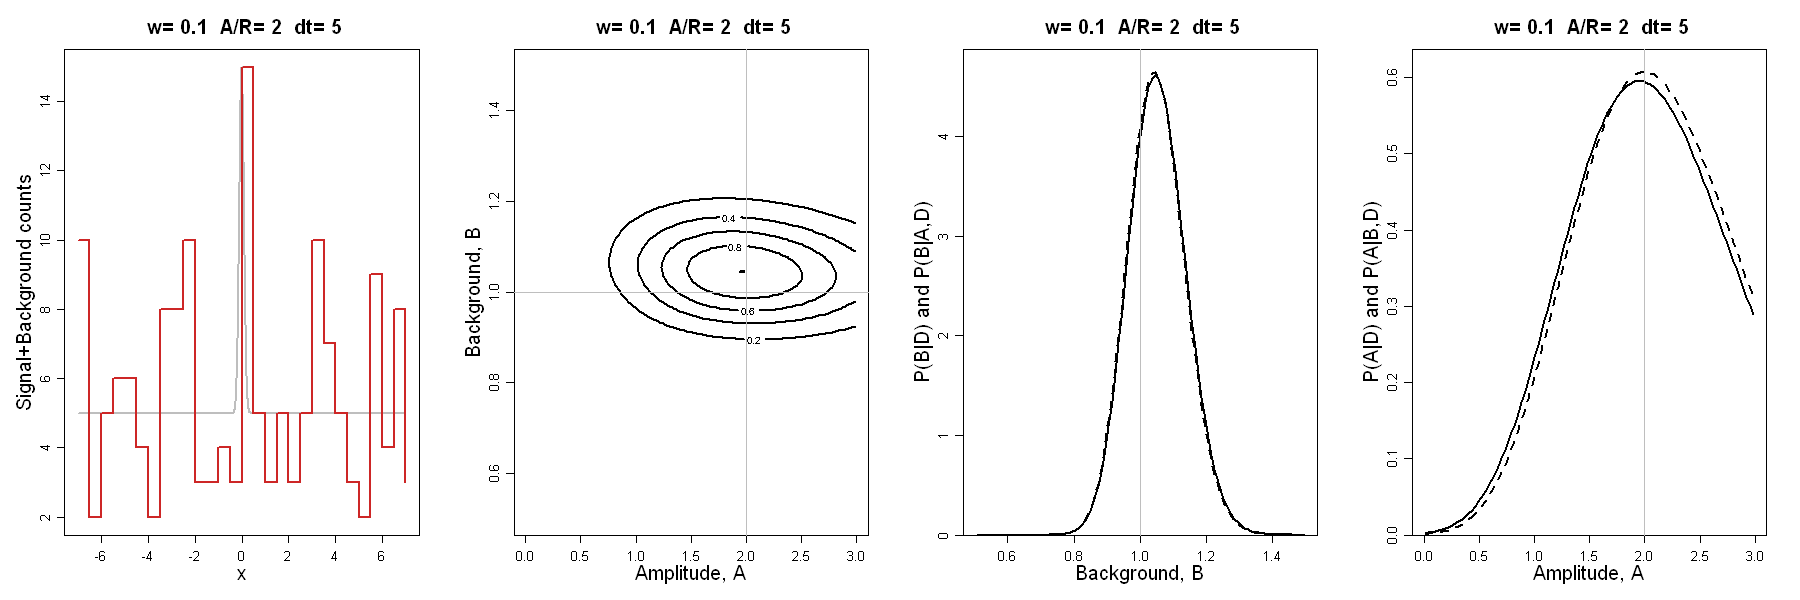

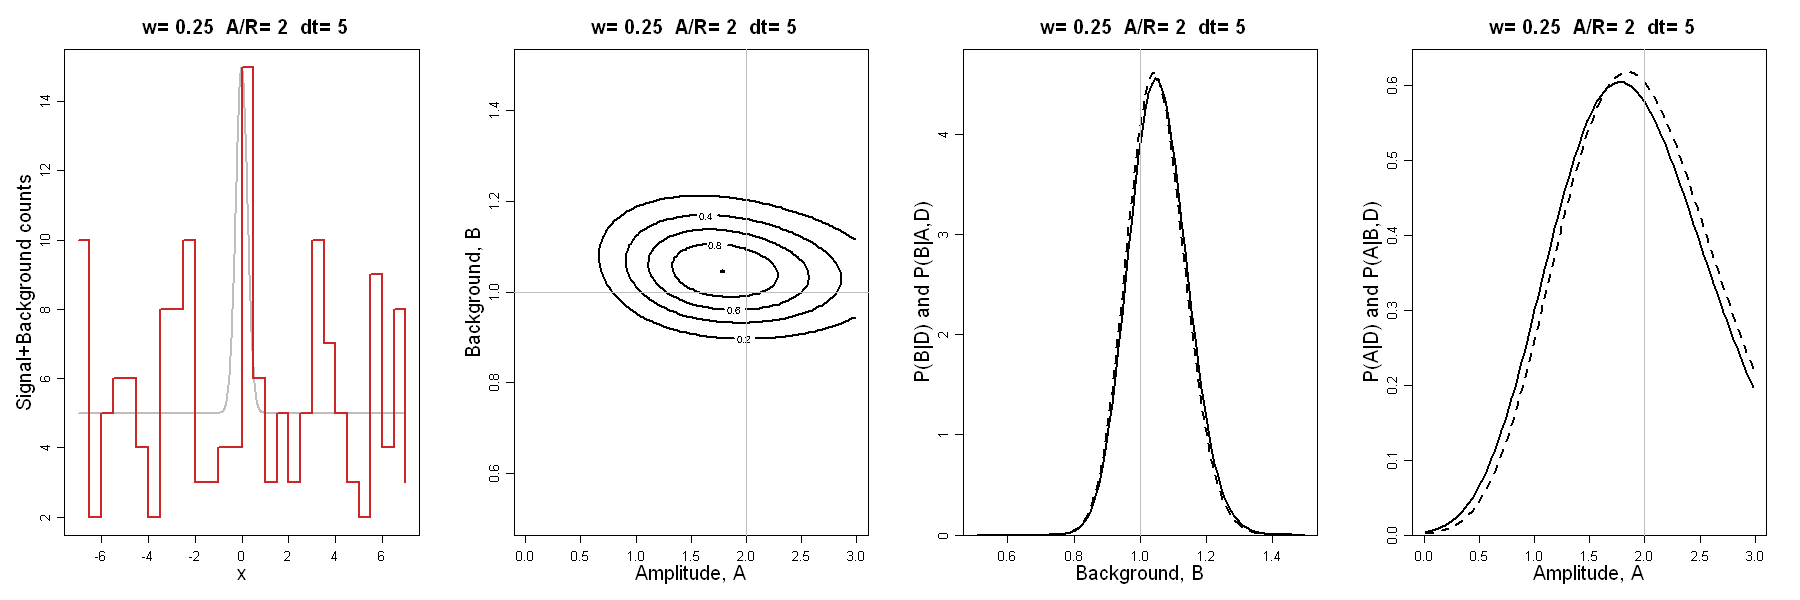

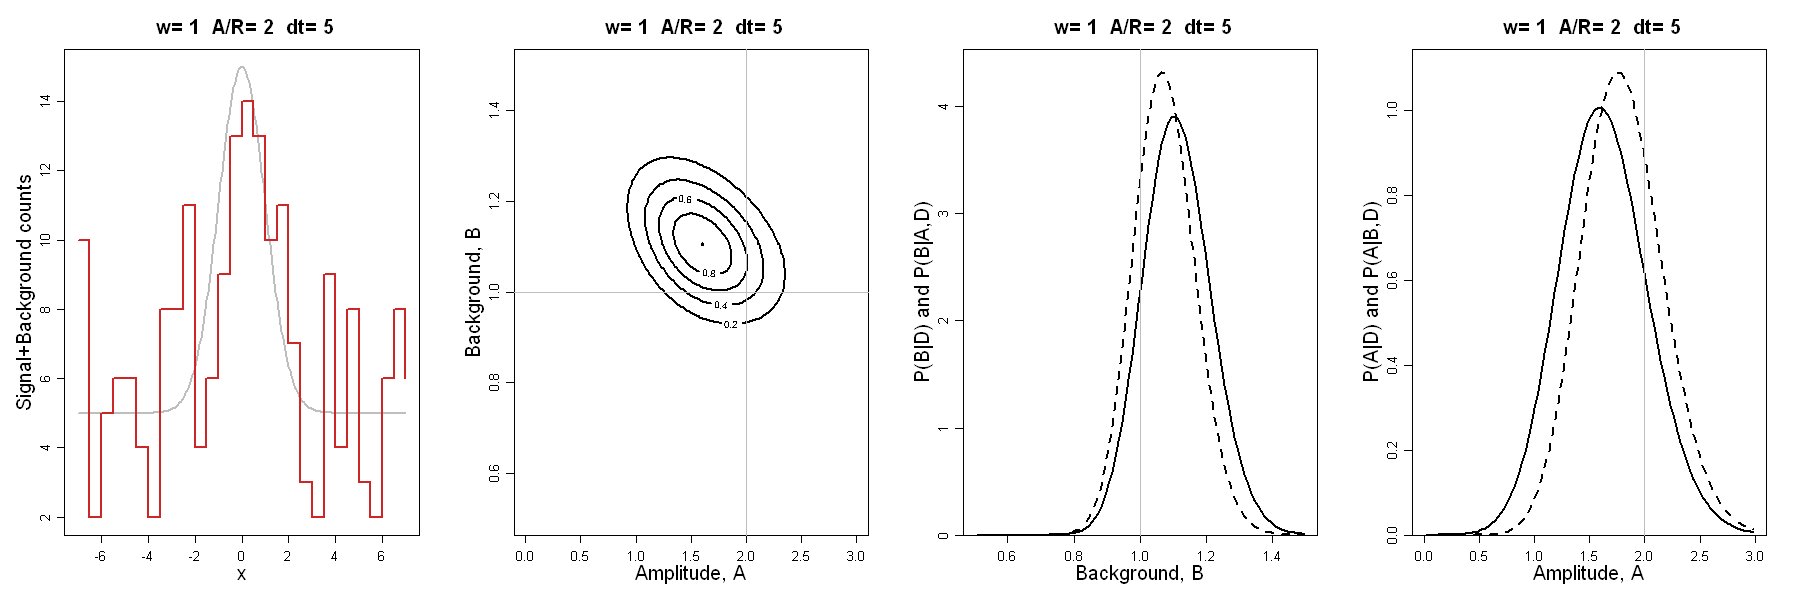

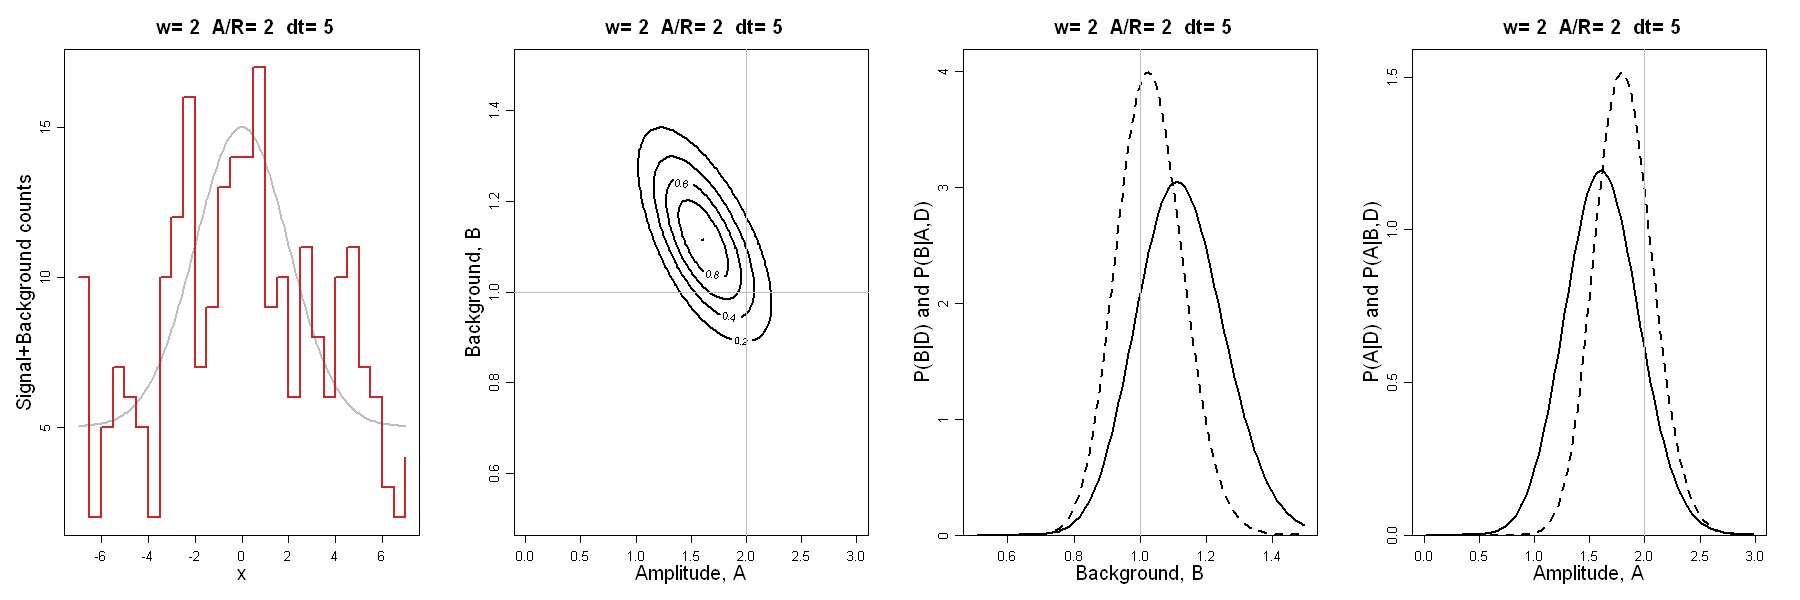

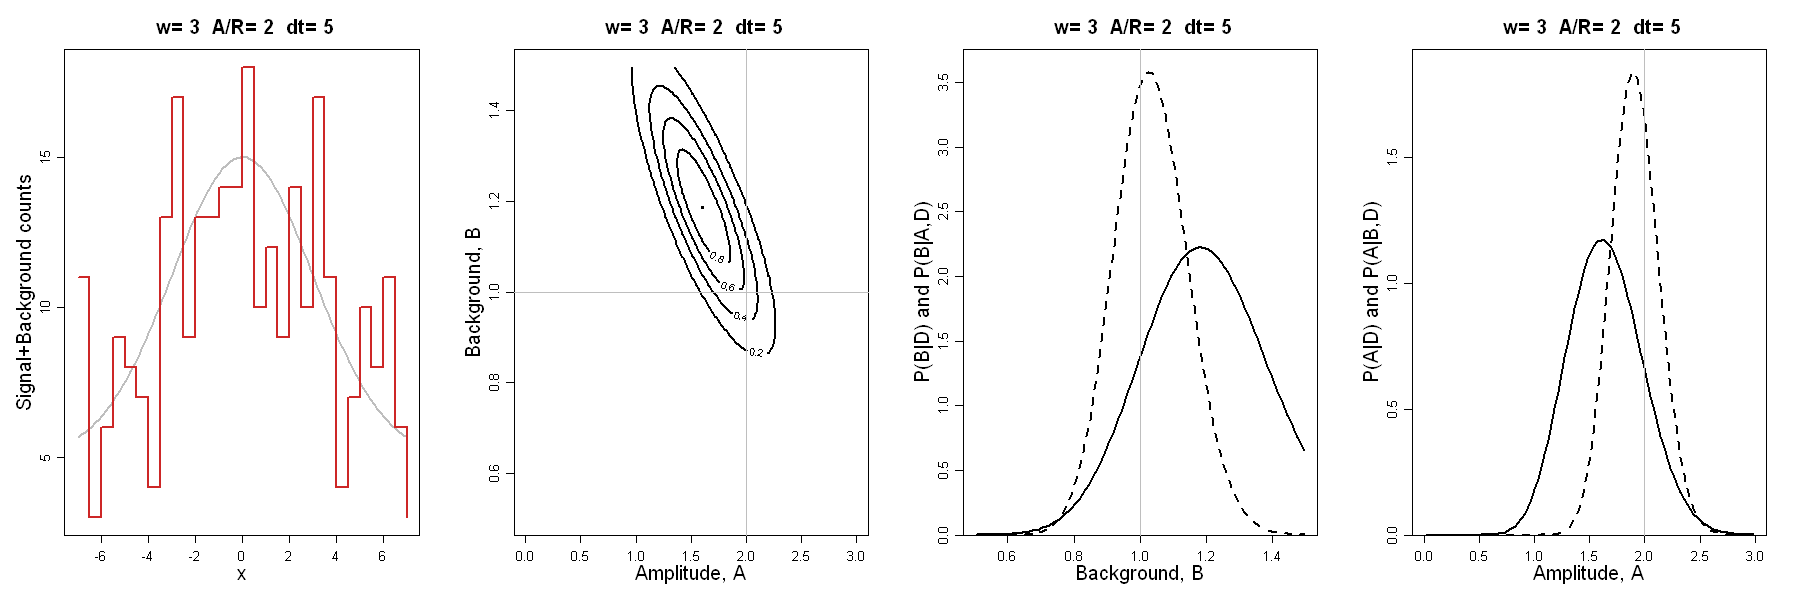

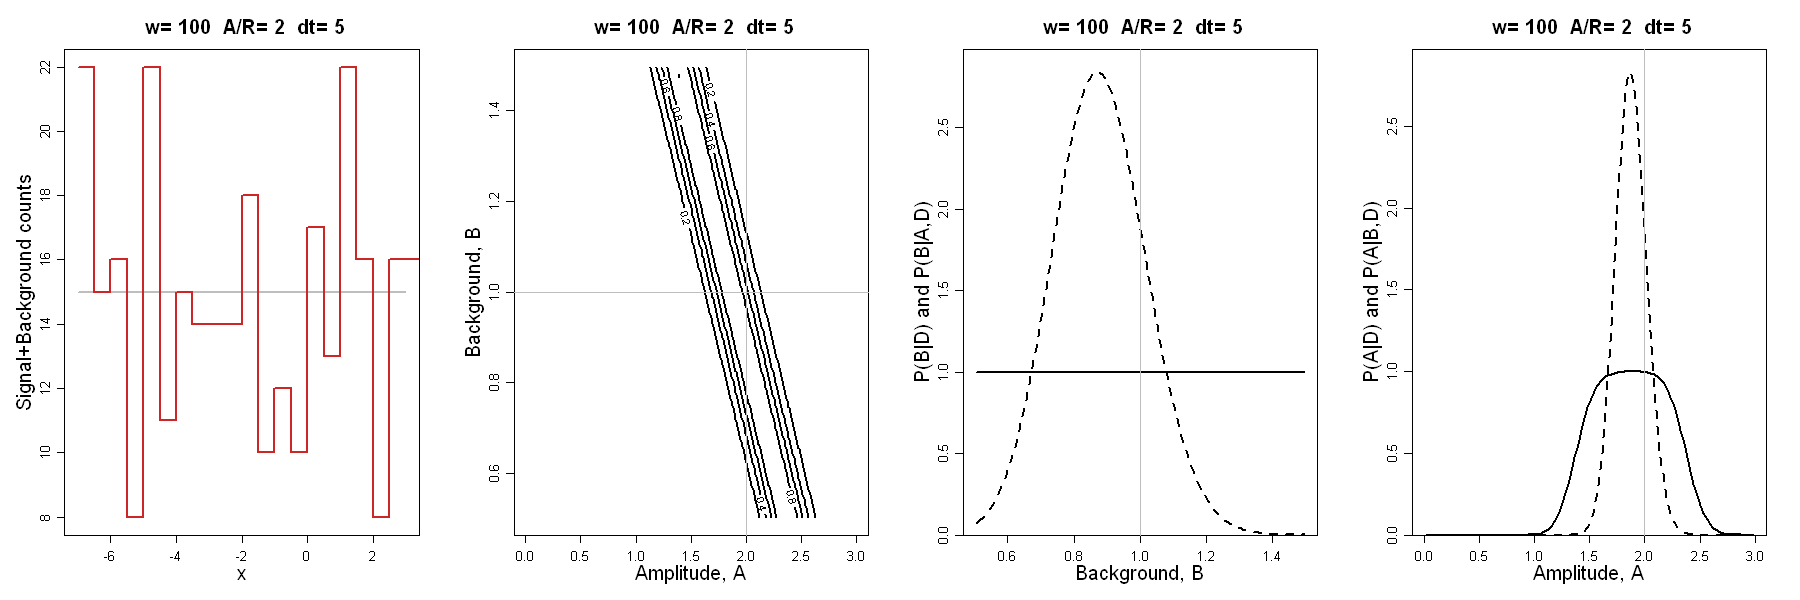

In [12]:
sampling.resolutions <- c(0.1, 0.25, 1, 2, 3, 100)
options(repr.plot.width=15, repr.plot.height=5)

for (w in sampling.resolutions){
 Results.w.fixed(w, A.true=2, B.true=1, Delta.t=5)   
}

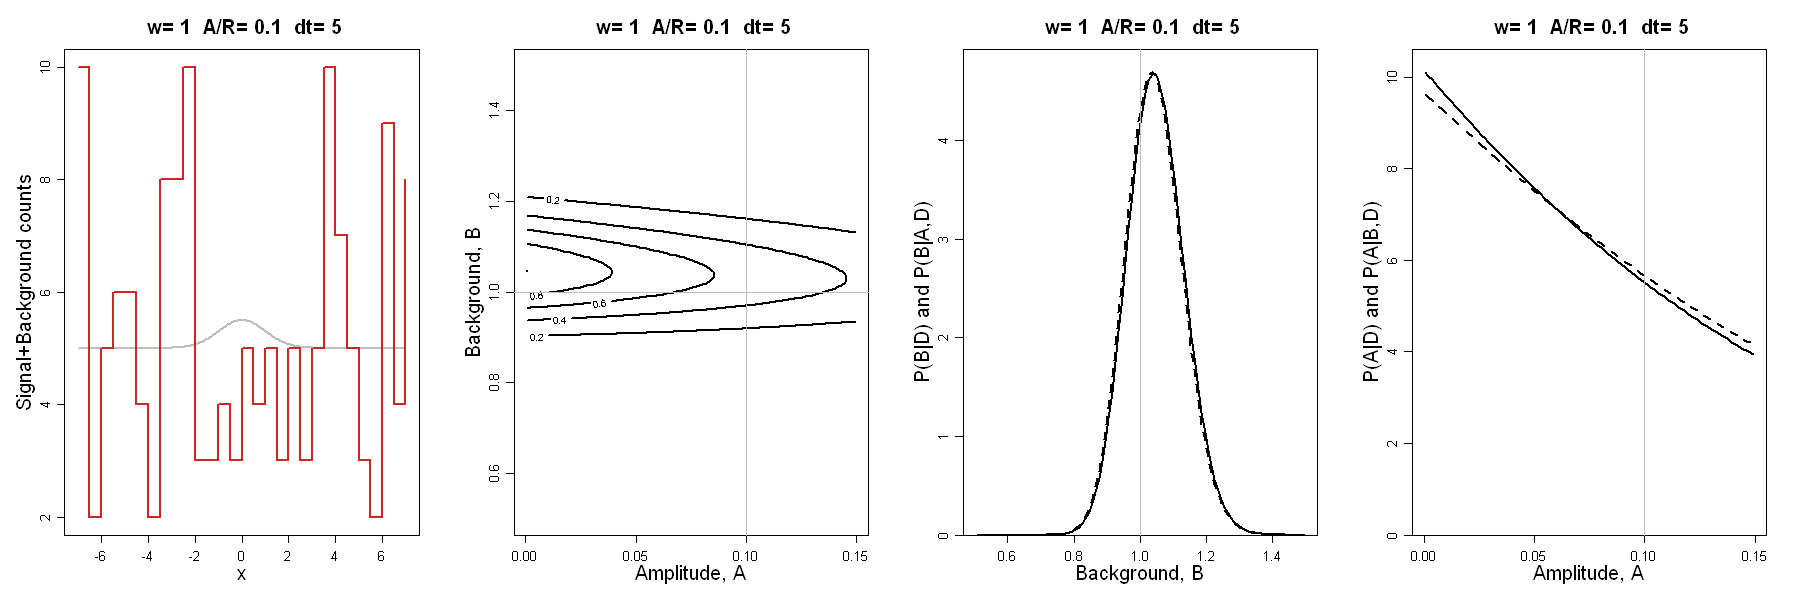

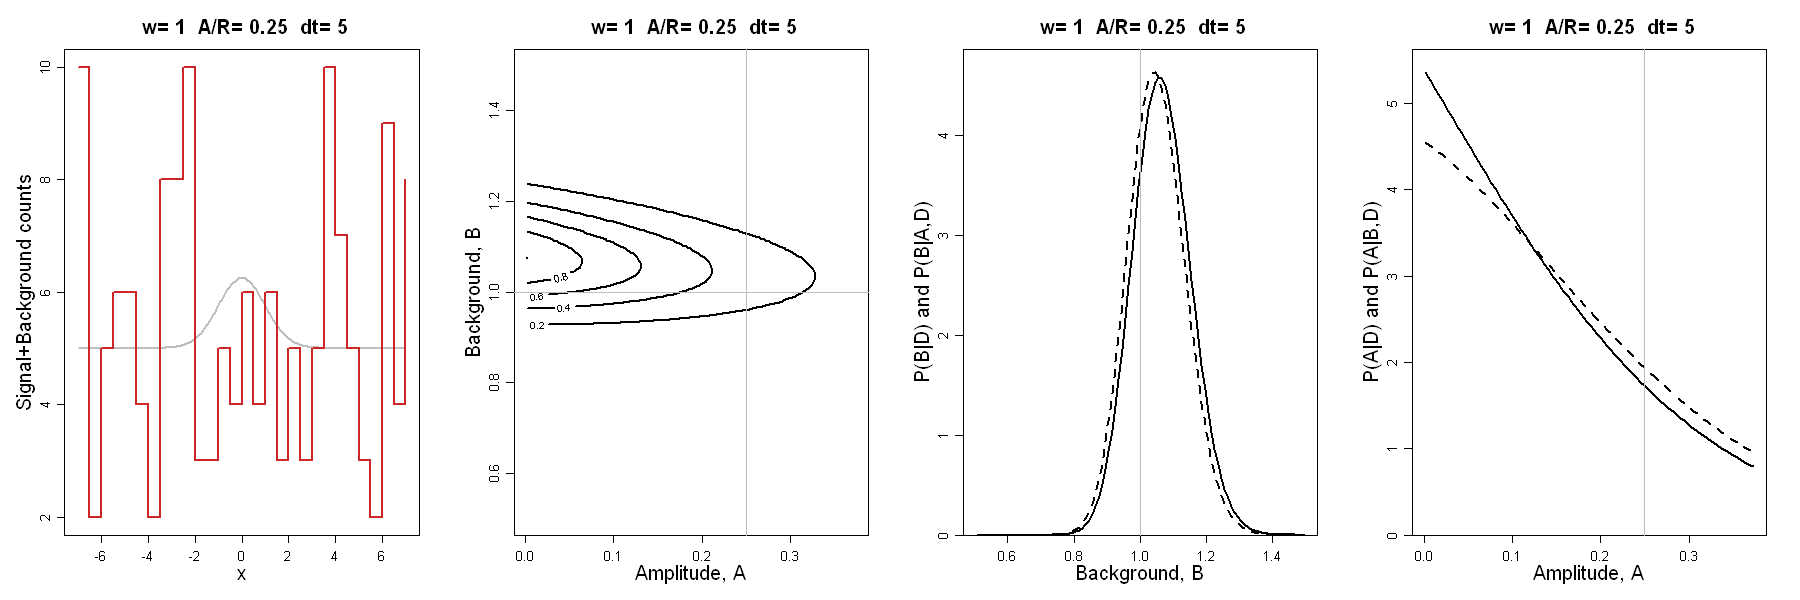

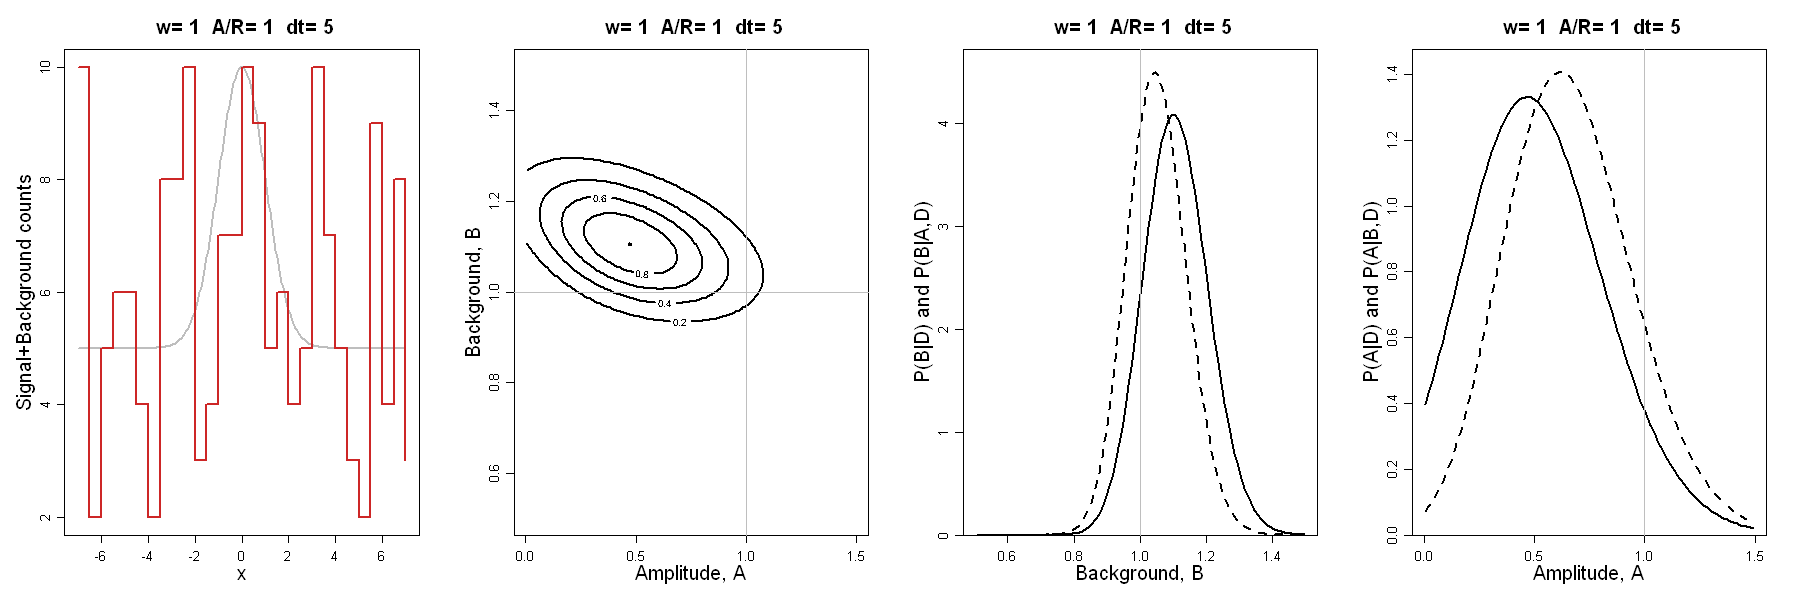

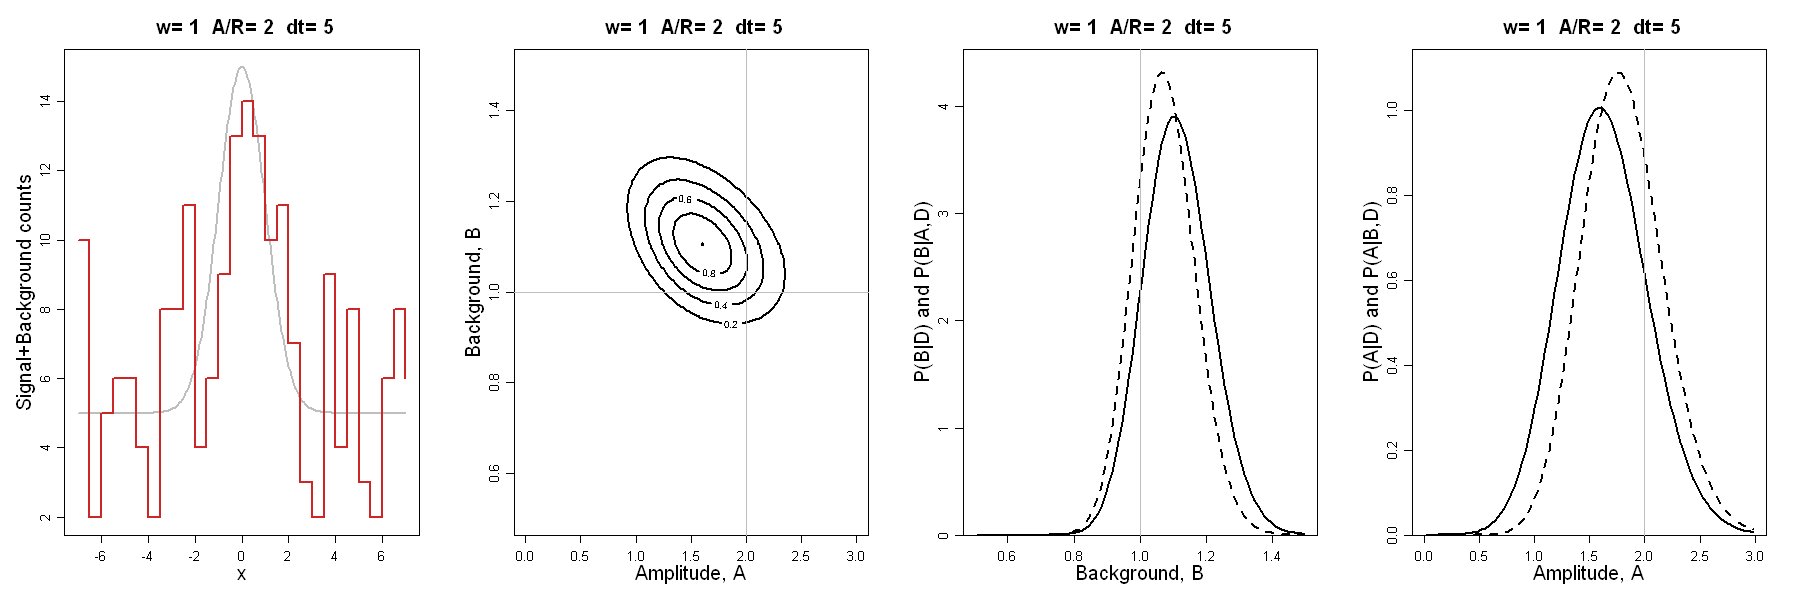

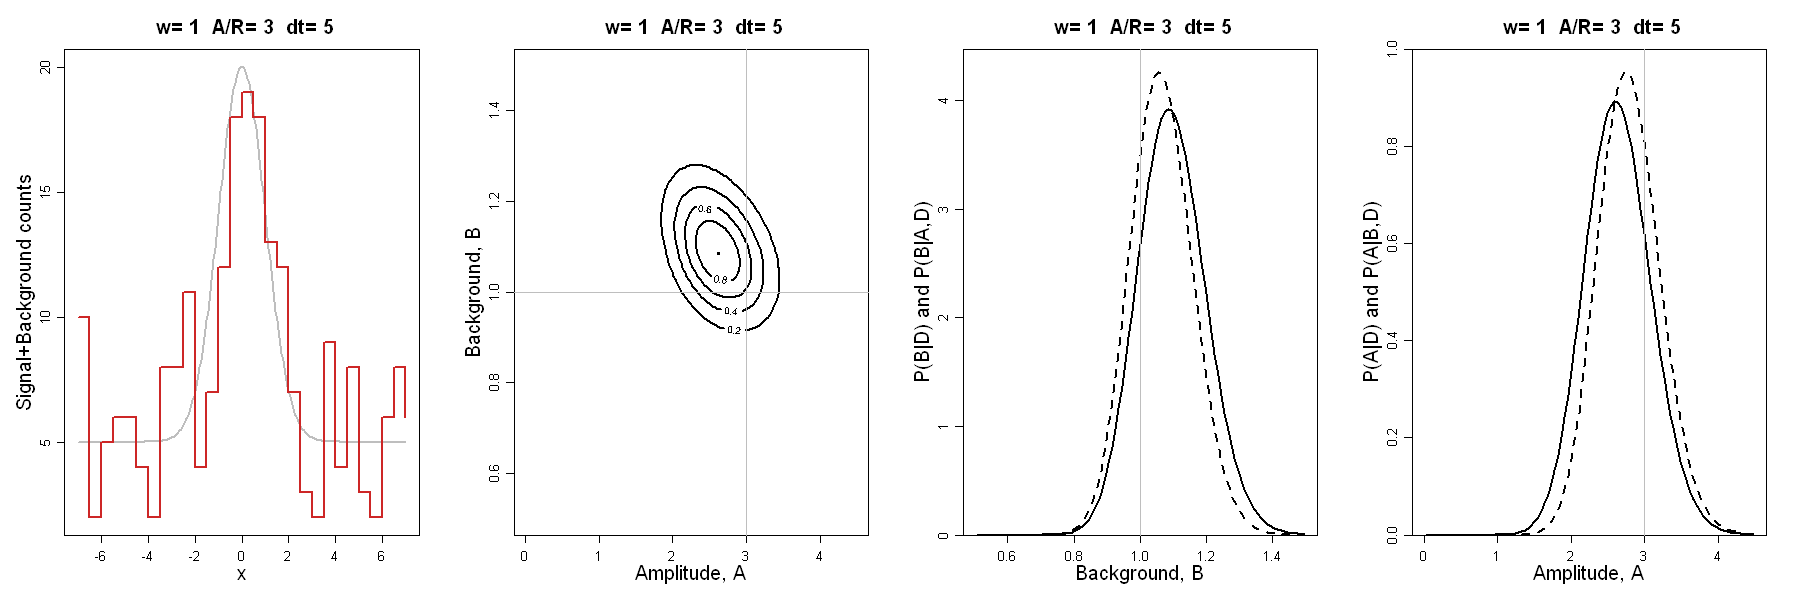

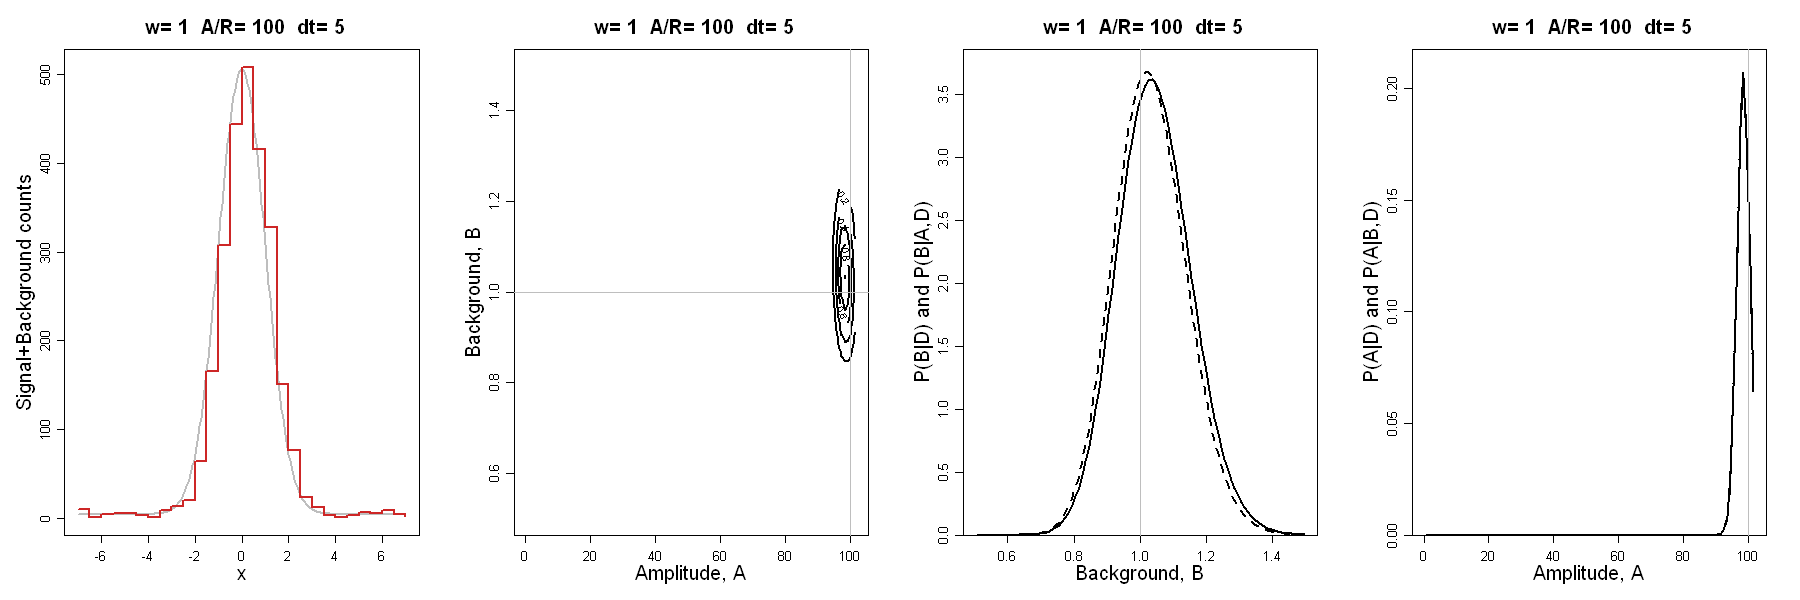

In [13]:
A.trues <- c(0.1, 0.25, 1, 2, 3, 100)
options(repr.plot.width=15, repr.plot.height=5)
for (at in A.trues) {
    Results(w=1,at,B.true=1, Delta.t=5)
}

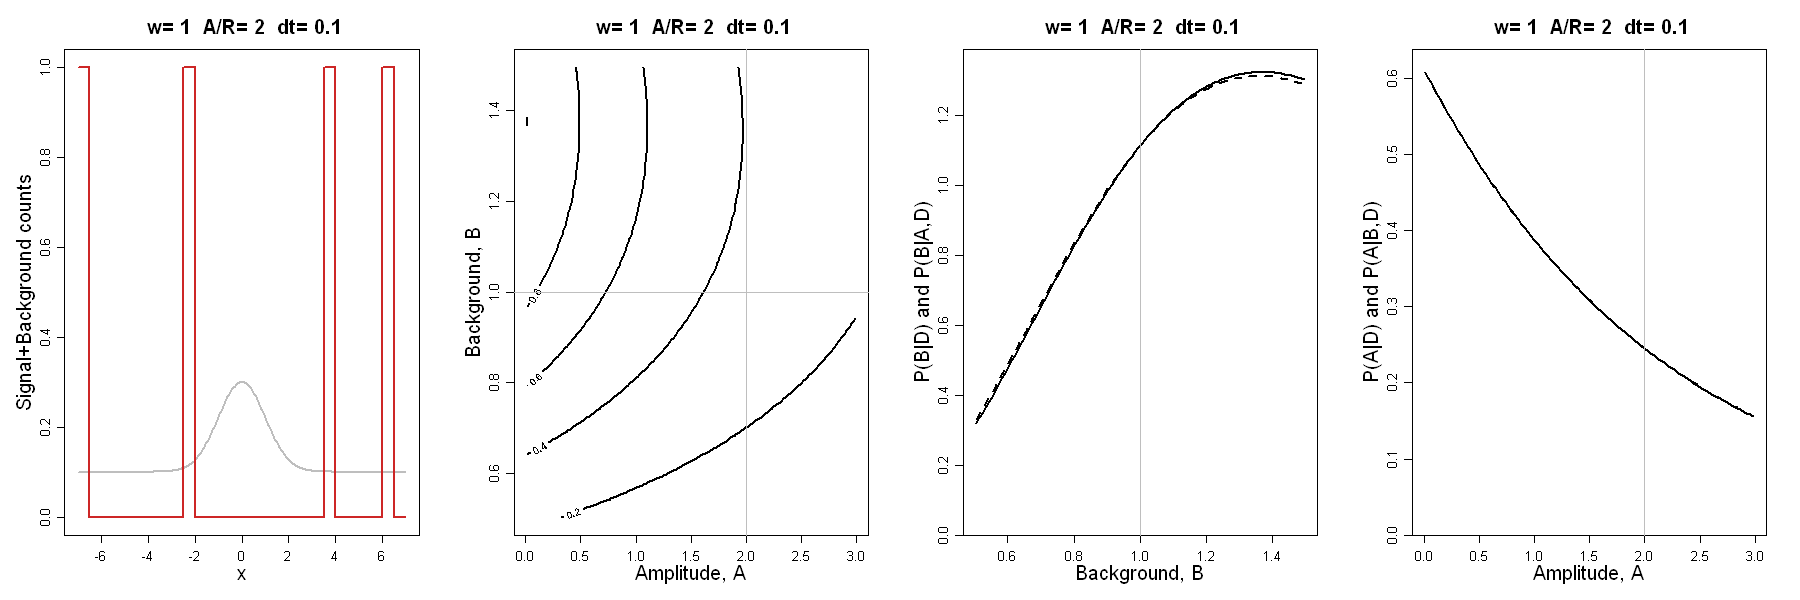

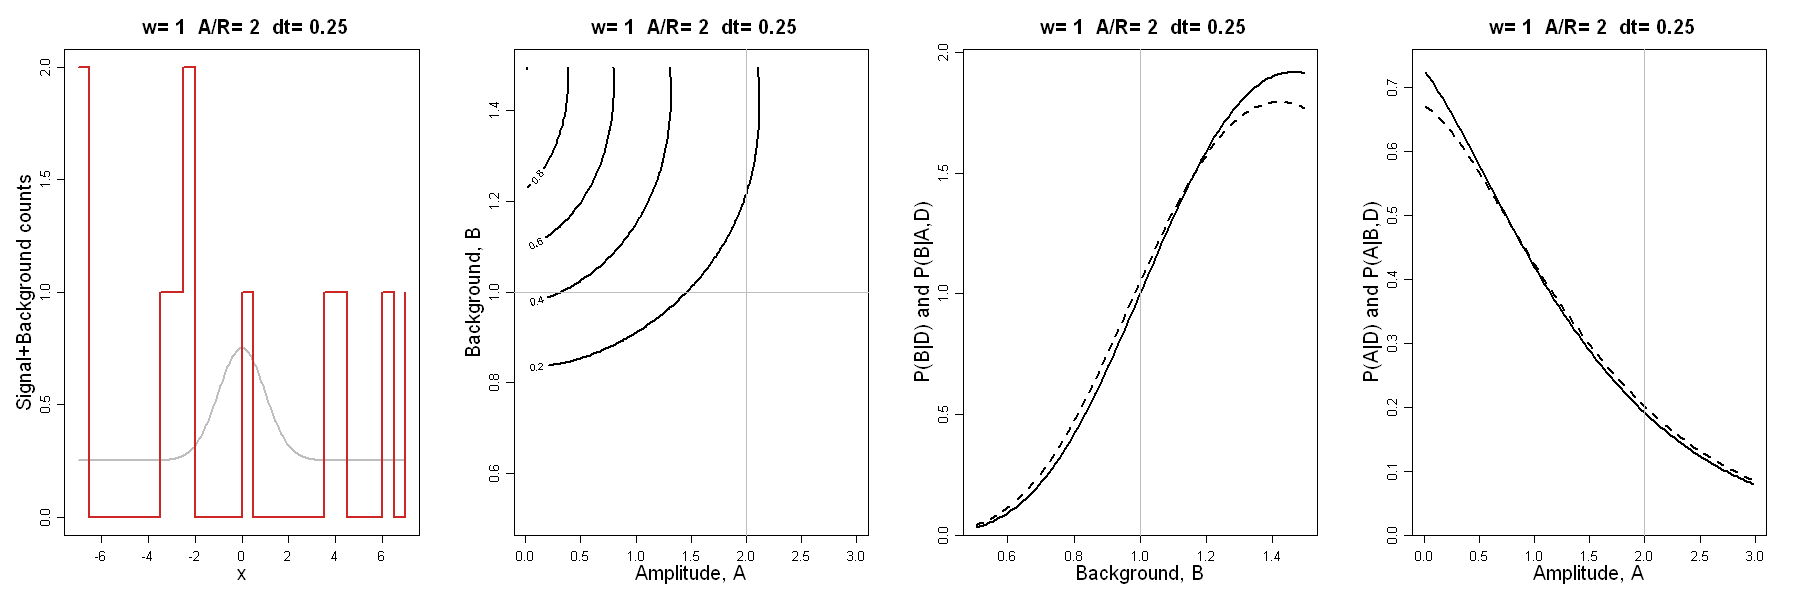

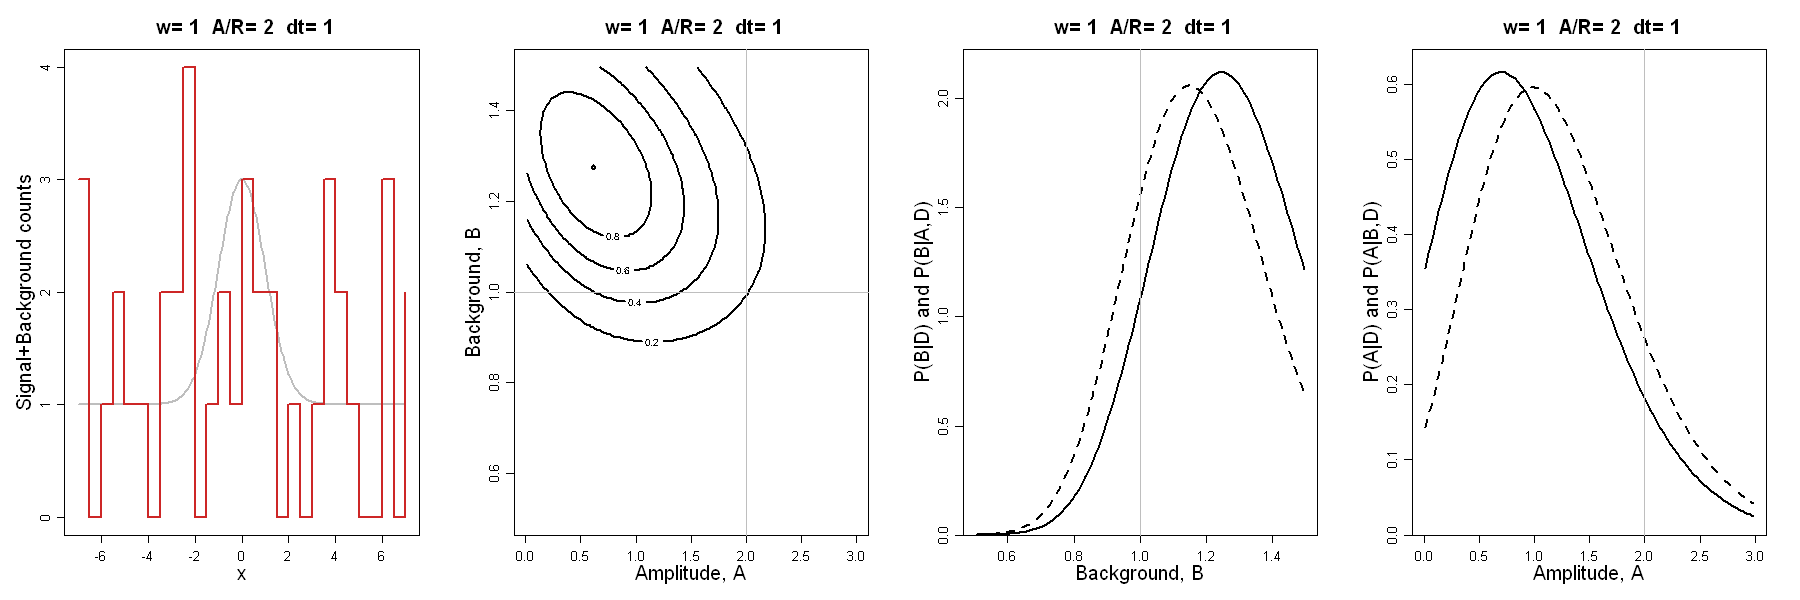

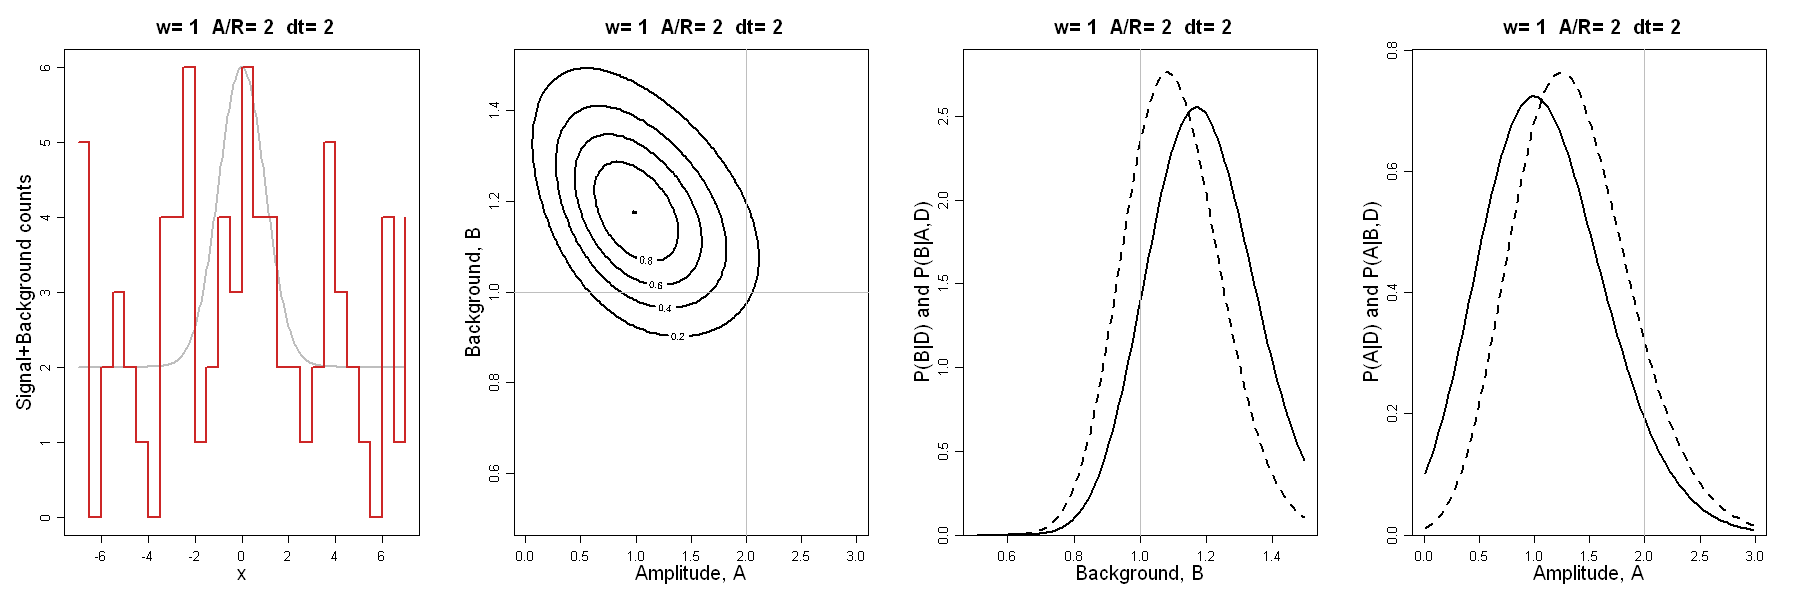

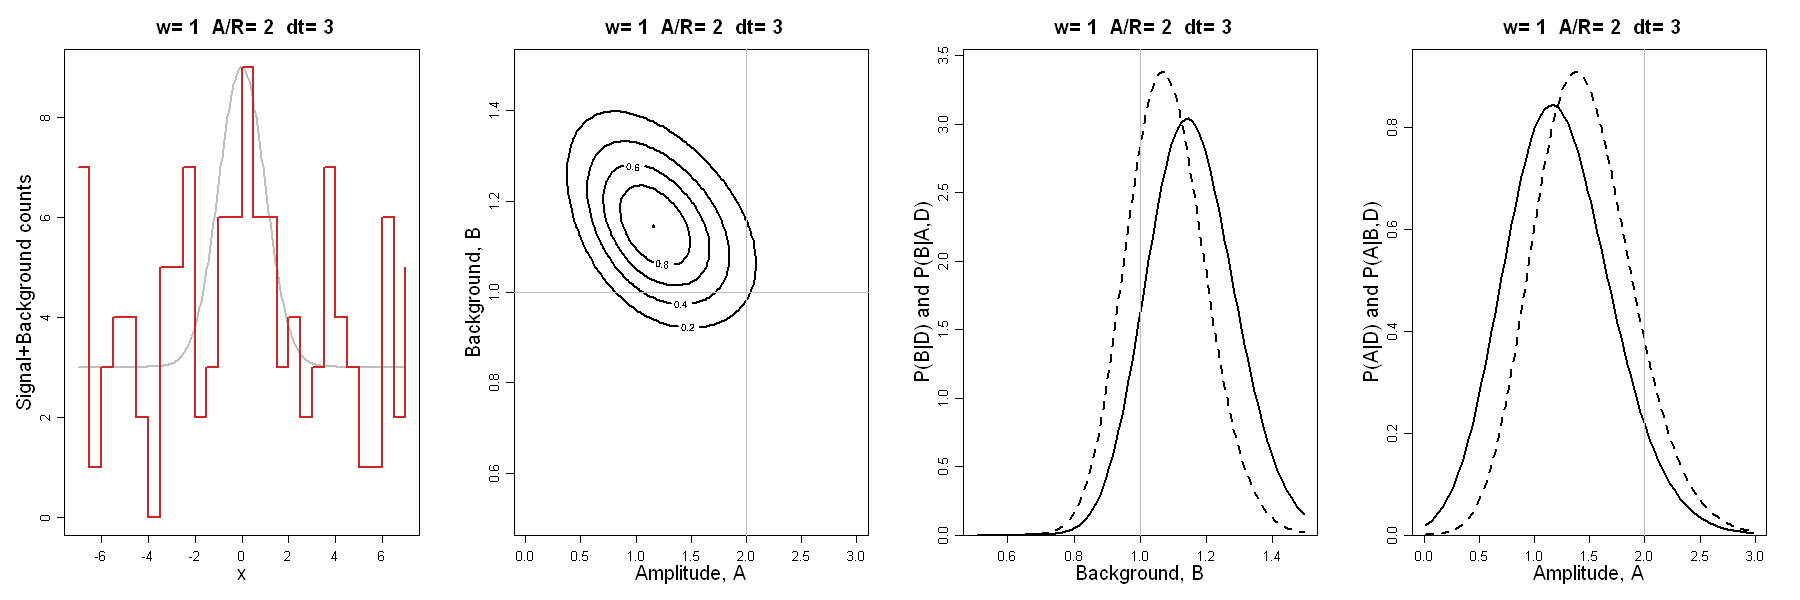

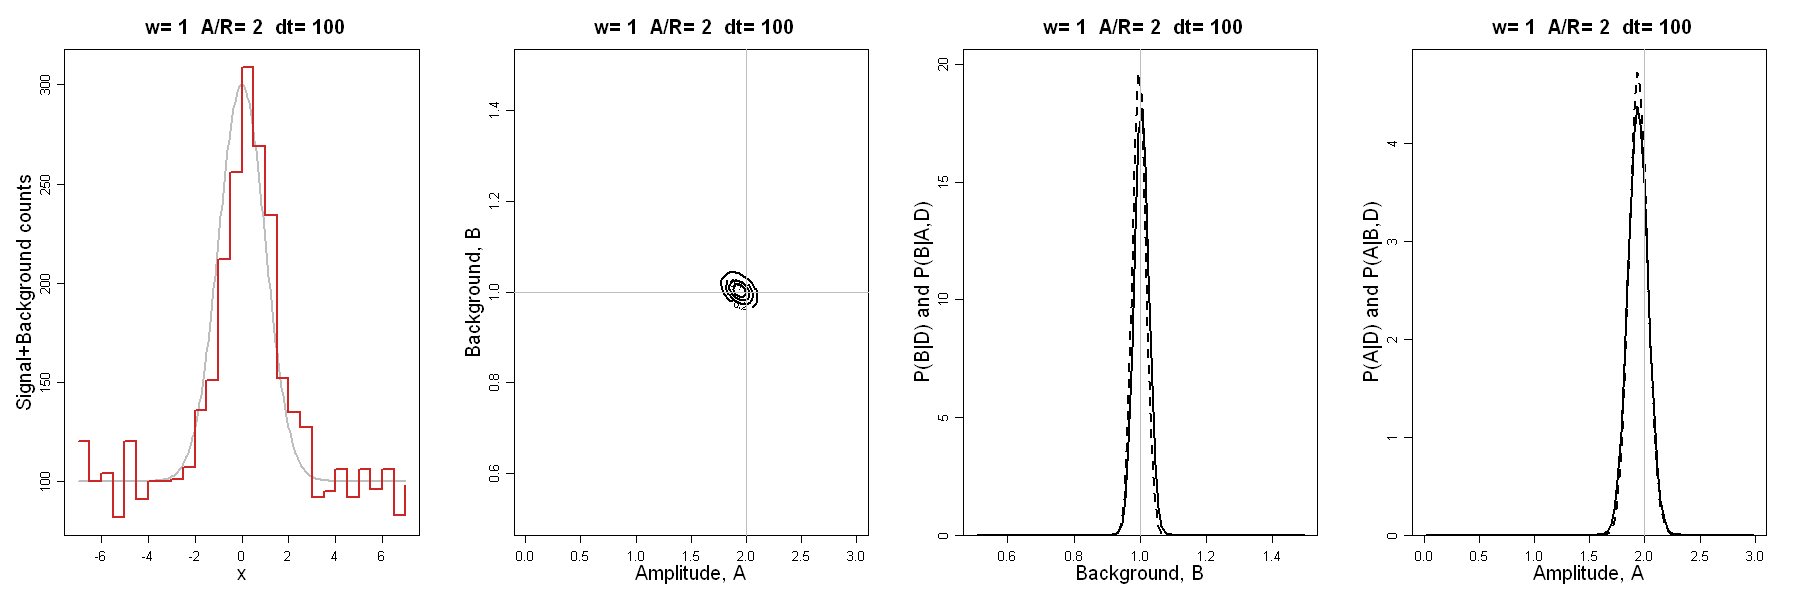

In [14]:
times <- c(0.1, 0.25, 1, 2, 3, 100)
options(repr.plot.width=15, repr.plot.height=5)
for (Delta.t in times) {
    Results(w=1, A.true=2, B.true=1, Delta.t)
}

Larger exposures implies more collected photons and smaller exposures a decrease in accuracy and precision